In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sqlalchemy import *
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from flask import Flask, jsonify

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['Measurement', 'Stations']

In [4]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [5]:
columns = inspector.get_columns('Stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [7]:
engine.execute('SELECT * FROM Stations LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [8]:
metadata = MetaData()

In [9]:
metadata.reflect(engine, only=['Measurement', 'Stations'])

In [10]:
Base = automap_base(metadata=metadata)
Base.prepare()

In [11]:
Measurement, Stations = Base.classes.Measurement, Base.classes.Stations

In [12]:
session = Session(engine)

# Percipation Analysis

In [13]:
annual_precip = (session
                .query(Measurement.date, Measurement.prcp)
                .filter(and_(Measurement.date <= '2017-12-31', Measurement.date >= '2017-01-01'))
                .all())
annual_precip

[('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26', 0.0),
 ('2017-01-27', 0.0),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.18),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 0.51),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.31),
 ('2017-02-12', 2.62),
 ('2017-02-13', 0.01),
 ('2017-02-14', 0.0),
 (

In [14]:
annual_precip_df = pd.DataFrame(annual_precip, columns=['date', 'prcp'])
annual_precip_df.set_index(pd.DatetimeIndex(annual_precip_df['date']), inplace=True)
annual_precip_df.describe()

,prcp
count,2534.000000
mean,0.165927
std,0.453823
min,0.000000
25%,0.000000
50%,0.000000
75%,0.107500
max,6.250000


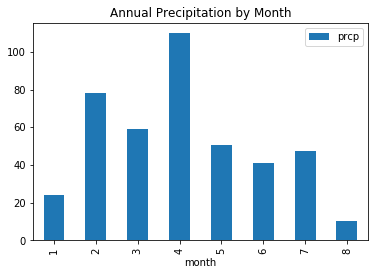

In [16]:
annual_precip_df['month'] = annual_precip_df.index.month
annual_precip_by_month = annual_precip_df.groupby('month').sum()

annual_precip_by_month.iloc[:].plot(kind='bar', title="Annual Precipitation by Month")
plt.show()

# Station Analysis

In [17]:
stations_count = (session
           .query(Measurement.station)
           .distinct(Measurement.station)
           .group_by(Measurement.station)
           .count())
stations_count

9

In [18]:
obs_count = (session
            .query(Measurement.station, Measurement.tobs)
            .group_by(Measurement.station)
            .order_by(Measurement.tobs.desc())
            .all())
obs_count

[('USC00514830', 82),
 ('USC00519523', 82),
 ('USC00519397', 81),
 ('USC00517948', 80),
 ('USC00519281', 79),
 ('USC00513117', 77),
 ('USC00516128', 76),
 ('USC00518838', 74),
 ('USC00511918', 64)]

In [19]:
max_station = obs_count[0][0]
tobs = (session
            .query(Measurement.tobs)
            .filter(Measurement.station == max_station)
            .filter(and_(Measurement.date <= '2017-12-31', Measurement.date >= '2017-01-01'))
            .all())
temps = []
for tob in tobs:
    temps.append(tob[0])

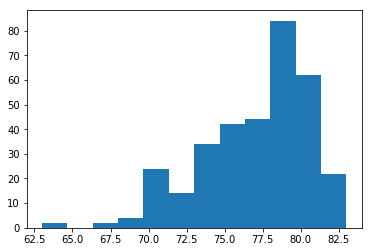

In [20]:
plt.hist(temps, bins=12)
plt.show()


# Temperature Analysis

In [21]:
def calc_temps(start_date, end_date):
    for date in [start_date, end_date]:
        if not re.match("^\d{4}-\d{2}-\d{2}$", date):
            print("Error: invalid date format, must be %Y-%m-%d")
            return False
    temps = []
    results = (session
        .query(Measurement.tobs)
        .filter(and_(Measurement.date <= end_date, Measurement.date >= start_date))
        .all())
    
    for result in results:
        temps.append(result[0])
    
    return({
        "min": np.min(temps),
        "max": np.max(temps),
        "mean": np.mean(temps)})

In [22]:
temps = calc_temps("2017-02-08", "2017-02-15")
print(temps)

{'min': 59, 'max': 80, 'mean': 69.659999999999997}


/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


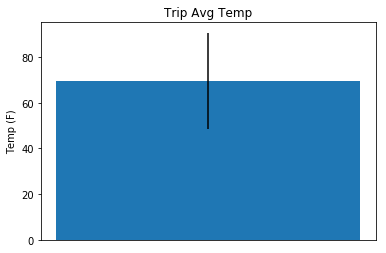

In [23]:
avg_temp = temps['mean']
y_pos = np.arange(0, 100, 20)
plt.bar(left=10, height=avg_temp, yerr=temps['max']-temps['min'])
plt.axes().get_xaxis().set_visible(False)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.show()

# Climate App

In [25]:
app = Flask(__name__)

In [26]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    results =   (session
                .query(Measurement.date, Measurement.prcp)
                .filter(and_(Measurement.date <= '2017-12-31', Measurement.date >= '2017-01-01'))
                .all())
    
    precip = []
    for result in results:
        row = {}
        row['date'] = result[0]
        row['prcp'] = float(result[1])
        precip.append(row)
        
    return jsonify(precip)

In [27]:
@app.route("/api/v1.0/stations")
def stations():
    results = (session
           .query(Station.stations)
           .all())
    
    stations_list = [row[0] for row in results]
    
    return jsonify(stations_list)

In [28]:
@app.route("/api/v1.0/tobs")
def tobs():
        results = (session
                .query(Measurement.date, Measurement.tobs)
                .filter(and_(Measurement.date <= '2017-12-31', Measurement.date >= '2017-01-01'))
                .all())
        
        tobs_list = []
        for result in results:
            row = {}
            row['date'] = result[0]
            row['tobs'] = float(result[1])
            tobs_list.append(row)
        
        return jsonify(tobs_list)

In [29]:
@app.route("/api/v1.0/<start>")
@app.route("/api/v1.0/<start>/<end>")
def by_date(start, end):
    if not end:
        end = datetime.date.today().strftime("%Y-%m-%d")
    return jsonify(calc_temps(start, end))

In [30]:
if __name__ == "__main__":
    app.run(debug=True)

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
